In [81]:
import logging
import sys
sys.path.append('/remote/gpu02/crescenzo/MadMiner')
from madminer.sampling import combine_and_shuffle
from madminer.core import MadMiner
from madminer.ml import MorphParameterizedRatioEstimator
from madminer.sampling import SampleAugmenter
from madminer import sampling
from madminer.utils.interfaces import _load_samples
import matplotlib.pyplot as plt
import numpy as np

In [82]:
# MadMiner output
logging.basicConfig(
    format="%(asctime)-5.5s %(name)-20.20s %(levelname)-7.7s %(message)s",
    datefmt="%H:%M",
    level=logging.INFO,
)

# Output of all other modules (e.g. matplotlib)
for key in logging.Logger.manager.loggerDict:
    if "madminer" not in key:
        logging.getLogger(key).setLevel(logging.WARNING)

In [83]:
miner = MadMiner()
miner.load("data/ratio_setup.h5")
miner.morpher.basis

13:25 madminer.utils.inter INFO    HDF5 file does not contain nuisance parameters information
13:25 madminer.utils.inter INFO    HDF5 file does not contain finite difference information
13:25 madminer.utils.inter INFO    HDF5 file does not contain observables information
13:25 madminer.utils.inter INFO    HDF5 file does not contain sample summary information
13:25 madminer.utils.inter INFO    HDF5 file does not contain sample information
13:25 madminer.utils.inter INFO    HDF5 file does not contain systematic information
13:25 madminer.core.madmin INFO    Found 2 parameters:
13:25 madminer.core.madmin INFO       CWL2 (LHA: dim6 2, Power: 2, Range: (0.0, 1.0))
13:25 madminer.core.madmin INFO       CPWL2 (LHA: dim6 5, Power: 2, Range: (0.0, 1.0))
13:25 madminer.core.madmin INFO    Found 6 benchmarks:
13:25 madminer.core.madmin INFO       SM: CWL2 = 0.00e+00, CPWL2 = 0.00e+00
13:25 madminer.core.madmin INFO       morphing_basis_vector_1: CWL2 = -1.45e+02, CPWL2 = 49.76
13:25 madminer.core

array([[   0.        ,    0.        ],
       [-144.52289539,   49.75926938],
       [-153.88529317,  173.00404865],
       [-126.2768689 , -199.52513699],
       [ 204.96438208,   96.97802885],
       [ 274.93658697, -132.64490488]])

In [84]:
_load_samples("data/training/lhe_data_0.h5")

(array([[ 1.84392253e-09,  1.12101561e+02,  9.89695163e-01],
        [ 2.92964275e-14,  9.50145832e+01, -1.18034628e+00],
        [ 3.00163136e-09,  1.71776303e+02,  3.10863161e+00],
        ...,
        [ 1.39001877e-09,  9.72764001e+01, -1.39363908e+00],
        [ 9.99982319e-10,  4.83997363e+01,  2.22130939e+00],
        [ 9.45572179e-09,  1.81549634e+02,  7.26470358e-01]]),
 array([[2.0762000e-07, 1.4239178e-06, 5.4283817e-08, 1.0208018e-05,
         4.1350328e-06, 3.9810999e-07],
        [2.0762000e-07, 1.2860857e-06, 2.6789217e-06, 2.0060284e-08,
         2.3958946e-08, 9.6152758e-07],
        [2.0762000e-07, 5.9259008e-07, 1.4204252e-06, 2.0403684e-06,
         3.3590978e-07, 5.5310253e-07],
        ...,
        [2.0762000e-07, 2.2125835e-06, 4.4183056e-06, 9.0485972e-08,
         1.0444663e-07, 2.8435593e-06],
        [2.0762000e-07, 1.9738979e-07, 7.2842867e-08, 6.4693713e-07,
         5.8047951e-08, 2.8427321e-07],
        [2.0762000e-07, 3.7527779e-05, 4.9910971e-05, 2.18841

In [86]:
miner.morpher.reduced_sigma_morphing(miner.morpher.basis[2])

43.492441595674634

In [5]:
for j in range(1,6):
    combine_and_shuffle([f"data/training/lhe_data_{j}.h5",f"data/training/lhe_data_0.h5"], f"data/lhe_data_training_{j}_shuffled.h5")

11:27 madminer.sampling.co WARNING Careful: this tool assumes that all samples are generated with the same setup, including identical benchmarks (and thus morphing setup), and identical nuisance parameters. If it is used with samples with different settings, there will be wrong results! There are no explicit cross checks in place yet.
11:27 madminer.utils.inter INFO    HDF5 file does not contain nuisance parameters information
11:27 madminer.utils.inter INFO    HDF5 file does not contain finite difference information
11:27 madminer.utils.inter INFO    HDF5 file does not contain systematic information
11:27 madminer.utils.inter INFO    HDF5 file does not contain nuisance parameters information
11:27 madminer.utils.inter INFO    HDF5 file does not contain finite difference information
11:27 madminer.utils.inter INFO    HDF5 file does not contain systematic information
11:27 madminer.sampling.co WARNING Careful: this tool assumes that all samples are generated with the same setup, includi

In [131]:
tr = _load_samples(f"data/lhe_data_training_2_shuffled.h5")
ys = tr[2]
print(tr[2])
mask = ys == 0
indexes = np.copy(tr[2])
indexes[mask] = tr[2][~mask][0]
indexes[~mask] = 0
print(indexes)
ratio_differential_cs = (tr[1])[np.arange(np.shape(tr[2])[0]),indexes]/(tr[1])[np.arange(np.shape(tr[2])[0]),tr[2]]
ratio_differential_cs[~mask] = 1./ratio_differential_cs[~mask]
ratio_differential_cs

[0 0 2 ... 0 0 2]
[2 2 0 ... 2 2 0]


array([2.27408308e+00, 8.66047202e-02, 2.99358388e+01, ...,
       7.03813409e+02, 6.43384645e-02, 4.99430952e+03])

In [128]:
a = np.asarray([2.,20])
a[0] = 1./a[0]
a

array([ 0.5, 20. ])

In [113]:
tr = _load_samples(f"data/lhe_data_training_2_shuffled.h5")
ys = tr[2]

In [114]:
tr[2]

array([0, 0, 2, ..., 0, 0, 2])

In [116]:
indexes

array([2, 2, 0, ..., 2, 2, 0])

In [109]:
indexes


array([2, 2, 0, ..., 2, 2, 0])

In [106]:
~tr[2]

array([-1, -1, -3, ..., -1, -1, -3])

In [102]:
tr[1][np.arange(np.shape(tr[2])[0]),tr[2]]

array([2.0762e-07, 2.0762e-07, 9.0320e-06, ..., 2.0762e-07, 2.0762e-07,
       9.0320e-06])

In [99]:
tr[1][np.arange(np.shape(tr[2])[0]),tr[2]] 

array([2.0762e-07, 2.0762e-07, 9.0320e-06, ..., 2.0762e-07, 2.0762e-07,
       9.0320e-06])

In [104]:
zeros_mask = tr[2]==0
val = tr[2][~zeros_mask][0]

2

In [80]:
bsm_cs

41826.88698826478

In [28]:
ratio = ratio_differential_cs
(ratio[mask])

array([1., 1., 1., ..., 1., 1., 1.])

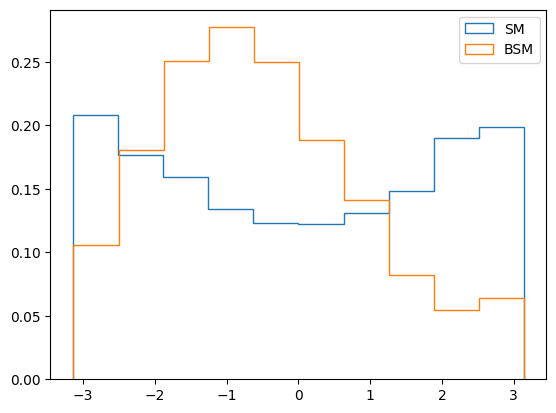

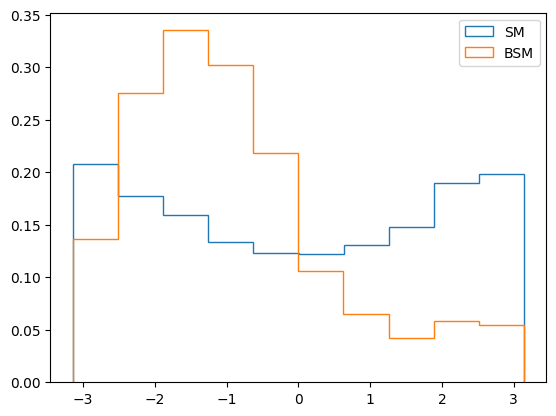

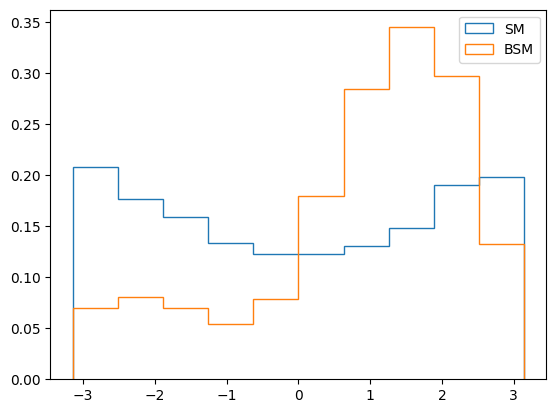

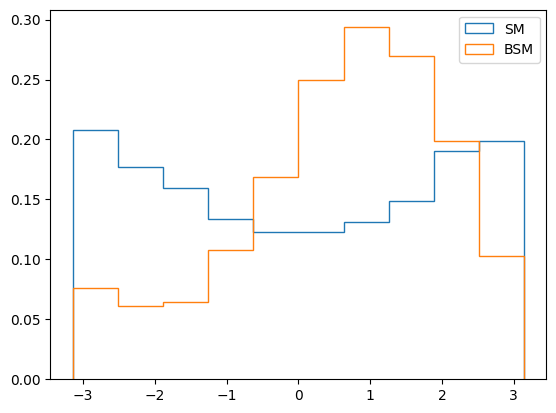

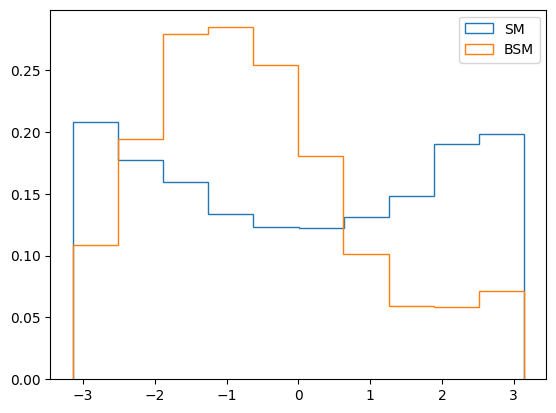

<Figure size 640x480 with 0 Axes>

In [132]:
for j in range(1,6):
    training = _load_samples(f"data/lhe_data_training_{j}_shuffled.h5")
    ys = training[2]
    mask = ys == 0
    ratio_differential_cs = (tr[1])[np.arange(np.shape(tr[2])[0]),indexes]/(tr[1])[np.arange(np.shape(tr[2])[0]),tr[2]]
    ratio_differential_cs[~mask] = 1./ratio_differential_cs[~mask]
    ratio_differential_cs=ratio_differential_cs/miner.morpher.reduced_sigma_morphing(miner.morpher.basis[j])
    xs = training[0]
    sm = xs[mask]
    bsm = xs[~mask]
    plt.hist(sm[:,2],density=True,histtype='step',label="SM")
    plt.hist(bsm[:,2],density=True,histtype='step',label="BSM")
    plt.legend()
    plt.show()
    plt.clf()

13:59 madminer.ml.paramete INFO    Starting training
13:59 madminer.ml.paramete INFO      Method:                 alice
13:59 madminer.ml.paramete INFO      Batch size:             128
13:59 madminer.ml.paramete INFO      Optimizer:              amsgrad
13:59 madminer.ml.paramete INFO      Epochs:                 40
13:59 madminer.ml.paramete INFO      Learning rate:          0.001 initially, decaying to 0.0001
13:59 madminer.ml.paramete INFO      Validation split:       0.25
13:59 madminer.ml.paramete INFO      Early stopping:         True
13:59 madminer.ml.paramete INFO      Scale inputs:           True
13:59 madminer.ml.paramete INFO      Scale parameters:       True
13:59 madminer.ml.paramete INFO      Shuffle labels          False
13:59 madminer.ml.paramete INFO      Samples:                all
13:59 madminer.ml.paramete INFO    Loading training data
13:59 madminer.ml.paramete INFO    Found 10000 samples with 3 observables
13:59 madminer.ml.base     INFO    Setting up input rescal

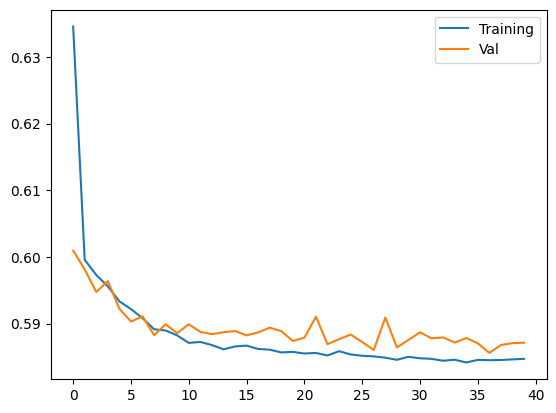

13:59 madminer.ml.paramete INFO    Starting training
13:59 madminer.ml.paramete INFO      Method:                 alice
13:59 madminer.ml.paramete INFO      Batch size:             128
13:59 madminer.ml.paramete INFO      Optimizer:              amsgrad
13:59 madminer.ml.paramete INFO      Epochs:                 40
13:59 madminer.ml.paramete INFO      Learning rate:          0.001 initially, decaying to 0.0001
13:59 madminer.ml.paramete INFO      Validation split:       0.25
13:59 madminer.ml.paramete INFO      Early stopping:         True
13:59 madminer.ml.paramete INFO      Scale inputs:           True
13:59 madminer.ml.paramete INFO      Scale parameters:       True
13:59 madminer.ml.paramete INFO      Shuffle labels          False
13:59 madminer.ml.paramete INFO      Samples:                all
13:59 madminer.ml.paramete INFO    Loading training data
13:59 madminer.ml.paramete INFO    Found 10000 samples with 3 observables
13:59 madminer.ml.base     INFO    Setting up input rescal

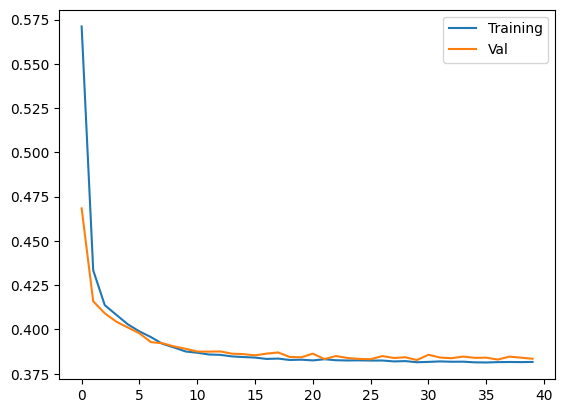

13:59 madminer.ml.paramete INFO    Starting training
13:59 madminer.ml.paramete INFO      Method:                 alice
13:59 madminer.ml.paramete INFO      Batch size:             128
13:59 madminer.ml.paramete INFO      Optimizer:              amsgrad
13:59 madminer.ml.paramete INFO      Epochs:                 40
13:59 madminer.ml.paramete INFO      Learning rate:          0.001 initially, decaying to 0.0001
13:59 madminer.ml.paramete INFO      Validation split:       0.25
13:59 madminer.ml.paramete INFO      Early stopping:         True
13:59 madminer.ml.paramete INFO      Scale inputs:           True
13:59 madminer.ml.paramete INFO      Scale parameters:       True
13:59 madminer.ml.paramete INFO      Shuffle labels          False
13:59 madminer.ml.paramete INFO      Samples:                all
13:59 madminer.ml.paramete INFO    Loading training data
13:59 madminer.ml.paramete INFO    Found 10000 samples with 3 observables
13:59 madminer.ml.base     INFO    Setting up input rescal

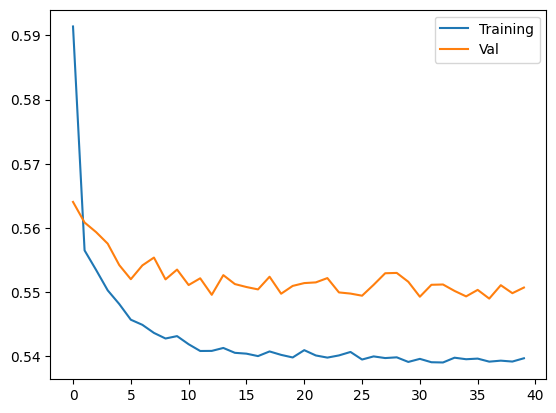

13:59 madminer.ml.paramete INFO    Starting training
13:59 madminer.ml.paramete INFO      Method:                 alice
13:59 madminer.ml.paramete INFO      Batch size:             128
13:59 madminer.ml.paramete INFO      Optimizer:              amsgrad
13:59 madminer.ml.paramete INFO      Epochs:                 40
13:59 madminer.ml.paramete INFO      Learning rate:          0.001 initially, decaying to 0.0001
13:59 madminer.ml.paramete INFO      Validation split:       0.25
13:59 madminer.ml.paramete INFO      Early stopping:         True
13:59 madminer.ml.paramete INFO      Scale inputs:           True
13:59 madminer.ml.paramete INFO      Scale parameters:       True
13:59 madminer.ml.paramete INFO      Shuffle labels          False
13:59 madminer.ml.paramete INFO      Samples:                all
13:59 madminer.ml.paramete INFO    Loading training data
13:59 madminer.ml.paramete INFO    Found 10000 samples with 3 observables
13:59 madminer.ml.base     INFO    Setting up input rescal

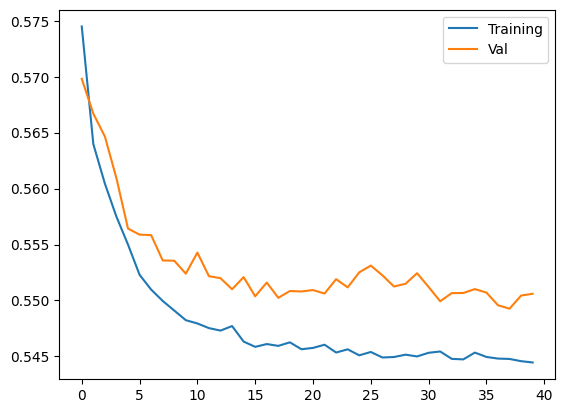

14:00 madminer.ml.paramete INFO    Starting training
14:00 madminer.ml.paramete INFO      Method:                 alice
14:00 madminer.ml.paramete INFO      Batch size:             128
14:00 madminer.ml.paramete INFO      Optimizer:              amsgrad
14:00 madminer.ml.paramete INFO      Epochs:                 40
14:00 madminer.ml.paramete INFO      Learning rate:          0.001 initially, decaying to 0.0001
14:00 madminer.ml.paramete INFO      Validation split:       0.25
14:00 madminer.ml.paramete INFO      Early stopping:         True
14:00 madminer.ml.paramete INFO      Scale inputs:           True
14:00 madminer.ml.paramete INFO      Scale parameters:       True
14:00 madminer.ml.paramete INFO      Shuffle labels          False
14:00 madminer.ml.paramete INFO      Samples:                all
14:00 madminer.ml.paramete INFO    Loading training data
14:00 madminer.ml.paramete INFO    Found 10000 samples with 3 observables
14:00 madminer.ml.base     INFO    Setting up input rescal

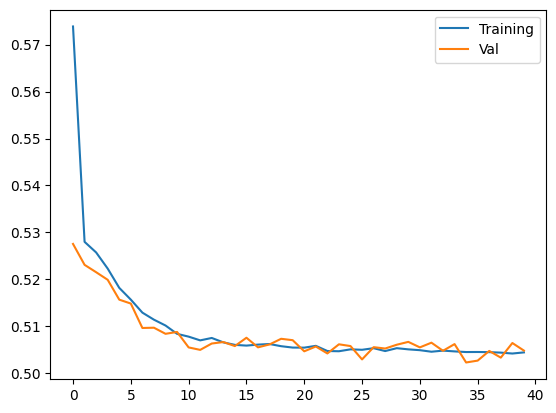

<Figure size 640x480 with 0 Axes>

In [143]:
for j in range(1,6):
    ## Dumb rearrangement
    training = _load_samples(f"data/lhe_data_training_{j}_shuffled.h5")
    ys = training[2]
    mask = ys == 0
    ratio_differential_cs = (tr[1])[np.arange(np.shape(tr[2])[0]),indexes]/(tr[1])[np.arange(np.shape(tr[2])[0]),tr[2]]
    ratio_differential_cs[~mask] = 1./ratio_differential_cs[~mask]
    ratio_differential_cs=ratio_differential_cs/miner.morpher.reduced_sigma_morphing(miner.morpher.basis[j])
    nn = MorphParameterizedRatioEstimator(n_hidden=(40,40),activation="tanh")
    loss = nn.train(
        method="alice",
        x=training[0],
        y=ys,
        r_xz=ratio_differential_cs,
        n_epochs=40,
        )
    nn.save(f"alice_models/benchmark_model_{j}")
    plt.plot(loss[0],label="Training")
    plt.plot(loss[1],label="Val")
    plt.legend()
    plt.show()
    plt.clf()